In [1]:
import pandas as pd 
import numpy as np 
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import calendar
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [5]:
data = pd.read_excel("Produit_1.xlsx")

In [8]:
dates = pd.date_range(start='2016-06-01', freq='MS', periods=len(data))

In [9]:
data.set_index(dates,inplace=True)

In [10]:
sales_ts = data['Data']

In [11]:
sales_ts

2016-06-01     194
2016-07-01     561
2016-08-01     854
2016-09-01     654
2016-10-01     655
2016-11-01     624
2016-12-01     625
2017-01-01     689
2017-02-01     699
2017-03-01     790
2017-04-01    1120
2017-05-01     918
2017-06-01    1015
2017-07-01    1089
2017-08-01    1285
2017-09-01     998
2017-10-01    1018
2017-11-01    1023
2017-12-01    1029
2018-01-01    1083
2018-02-01    1122
2018-03-01    1248
2018-04-01    1327
2018-05-01    1512
2018-06-01    1439
2018-07-01    1725
2018-08-01    1617
2018-09-01    1514
2018-10-01    1736
2018-11-01    1396
2018-12-01    1528
2019-01-01    1732
2019-02-01    1406
2019-03-01    1524
2019-04-01    1804
2019-05-01    1521
2019-06-01    1521
2019-07-01    1660
Freq: MS, Name: Data, dtype: int64

In [12]:
data = pd.DataFrame(sales_ts.copy())
data.head()

,Data
2016-06-01,194
2016-07-01,561
2016-08-01,854
2016-09-01,654
2016-10-01,655


In [15]:
# Splitting Train and Test Length
train_len = int(np.ceil(len(data) * 0.70))

In [16]:

train=data[0:train_len] 
test=data[train_len:]
print('Train data length :',len(train))
print('Test  data length :',len(test))

Train data length : 27
Test  data length : 11


In [18]:
x_train = train.drop('Data', axis=1)
x_test = test.drop('Data', axis=1)
y_train = train[['Data']]
y_test = test[['Data']]

In [20]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Data'].mean()

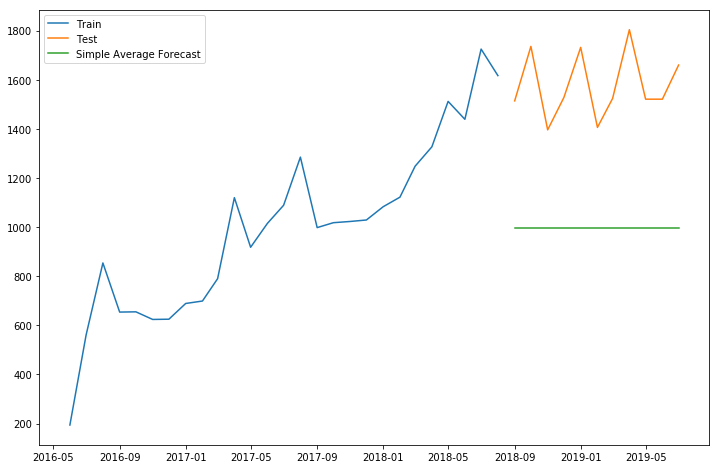

In [21]:
plt.figure(figsize=(12,8))
plt.plot(train['Data'], label='Train')
plt.plot(test['Data'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple Average Forecast')
plt.legend(loc='best')
plt.show()

In [23]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test.Data, y_hat_avg.avg_forecast))
rmse = round(rmse, 3)

In [24]:
#Mean Absolute Percentage Error
abs_error = np.abs(y_test['Data']-y_hat_avg.avg_forecast)
actual = y_test['Data']
mape = np.round(np.mean(abs_error/actual),4)
resultsDf = pd.DataFrame({'Method':['Simple average forecast'], 'RMSE': [rmse]})
resultsDf

,Method,RMSE
0,Simple average forecast,594.108


In [25]:
# Storing results in a dataframe
resultsDf = pd.DataFrame({'Method':['Simple average forecast'], 'MAPE': [mape], 'RMSE': [rmse]})
resultsDf = resultsDf[['Method', 'RMSE', 'MAPE']]
resultsDf

,Method,RMSE,MAPE
0,Simple average forecast,594.108,0.3635


In [26]:
df1 = data.copy()

In [27]:
for i in range(1,13):
    df1['moving_avg_forecast'] = data['Data'].rolling(i).mean()
    train=df1[0:train_len] 
    test=df1[train_len:]
    y_hat_avg = test.copy()
    rmse = np.sqrt(mean_squared_error(test.Data, y_hat_avg.moving_avg_forecast))
    abs_error = np.abs(y_test['Data']-y_hat_avg.moving_avg_forecast)
    actual = y_test['Data']
    mape = np.round(np.mean(abs_error/actual),4)
    print('Rolling window : ',i,'RMSE : ' ,np.round(rmse,2) ,'MAPE : ',mape)

Rolling window :  1 RMSE :  0.0 MAPE :  0.0
Rolling window :  2 RMSE :  110.01 MAPE :  0.0626
Rolling window :  3 RMSE :  128.3 MAPE :  0.0724
Rolling window :  4 RMSE :  101.84 MAPE :  0.0538
Rolling window :  5 RMSE :  120.25 MAPE :  0.0627
Rolling window :  6 RMSE :  124.85 MAPE :  0.0663
Rolling window :  7 RMSE :  120.12 MAPE :  0.0625
Rolling window :  8 RMSE :  130.72 MAPE :  0.0687
Rolling window :  9 RMSE :  138.0 MAPE :  0.072
Rolling window :  10 RMSE :  145.18 MAPE :  0.0733
Rolling window :  11 RMSE :  159.19 MAPE :  0.0789
Rolling window :  12 RMSE :  171.89 MAPE :  0.081


In [29]:
df1['moving_avg_forecast'] = data['Data'].rolling(4).mean()

In [31]:
#Creating train and test set 
train=df1[0:train_len] 
test=df1[train_len:]

In [32]:
y_hat_avg = test.copy()

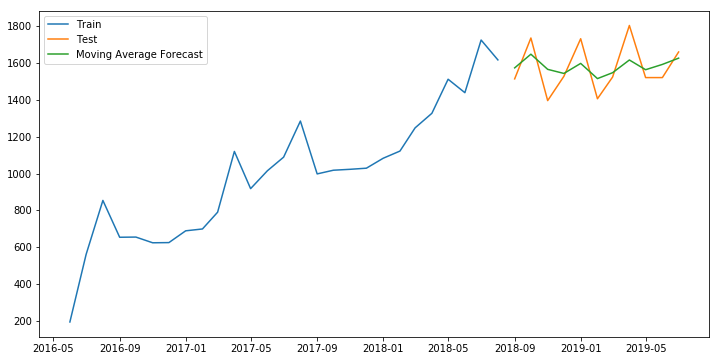

In [33]:
plt.figure(figsize=(12,6))
plt.plot(train['Data'], label='Train')
plt.plot(test['Data'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [34]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test.Data, y_hat_avg.moving_avg_forecast))
rmse = round(rmse, 3)
#Mean Absolute Percentage Error
abs_error = np.abs(y_test['Data']-y_hat_avg.moving_avg_forecast)
actual = y_test['Data']
mape = np.round(np.mean(abs_error/actual),4)
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Method':['Moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE', 'MAPE']]
resultsDf

,Method,RMSE,MAPE
0,Simple average forecast,594.108,0.3635
0,Moving average forecast,101.840,0.0538


In [35]:
# create class
model = SimpleExpSmoothing(train['Data'])

In [36]:
for i in np.arange(0.1,1,0.05):
    model_fit = model.fit(smoothing_level=i,optimized=False)
    y_hat_avg = test.copy()
    y_hat_avg['SES'] = model_fit.forecast(len(test['Data']))
    rmse = np.sqrt(mean_squared_error(test.Data, y_hat_avg.SES))
    rmse = round(rmse, 3)
    abs_error = np.abs(y_test['Data']-y_hat_avg.SES)
    actual = y_test['Data']
    mape = np.round(np.mean(abs_error/actual),4)
    print('smoothing_level : ',np.round(i,1),'RMSE : ' ,np.round(rmse,2) ,'MAPE : ',mape)

smoothing_level :  0.1 RMSE :  420.53 MAPE :  0.2488
smoothing_level :  0.2 RMSE :  290.38 MAPE :  0.1592
smoothing_level :  0.2 RMSE :  219.34 MAPE :  0.1067
smoothing_level :  0.3 RMSE :  176.79 MAPE :  0.0844
smoothing_level :  0.3 RMSE :  151.33 MAPE :  0.0684
smoothing_level :  0.4 RMSE :  137.43 MAPE :  0.0618
smoothing_level :  0.4 RMSE :  131.26 MAPE :  0.0674
smoothing_level :  0.5 RMSE :  129.75 MAPE :  0.0718
smoothing_level :  0.5 RMSE :  130.68 MAPE :  0.0751
smoothing_level :  0.6 RMSE :  132.62 MAPE :  0.0777
smoothing_level :  0.6 RMSE :  134.76 MAPE :  0.0797
smoothing_level :  0.7 RMSE :  136.65 MAPE :  0.0811
smoothing_level :  0.7 RMSE :  138.1 MAPE :  0.0821
smoothing_level :  0.8 RMSE :  139.01 MAPE :  0.0826
smoothing_level :  0.8 RMSE :  139.36 MAPE :  0.0829
smoothing_level :  0.9 RMSE :  139.18 MAPE :  0.0827
smoothing_level :  0.9 RMSE :  138.5 MAPE :  0.0823
smoothing_level :  1.0 RMSE :  137.38 MAPE :  0.0816


In [37]:
# fit model
model_fit = model.fit(smoothing_level=0.4,optimized=False)
model_fit.params

{'smoothing_level': 0.4,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 194.0,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [38]:
y_hat_avg = test.copy()
y_hat_avg['SES'] = model_fit.forecast(len(test['Data']))

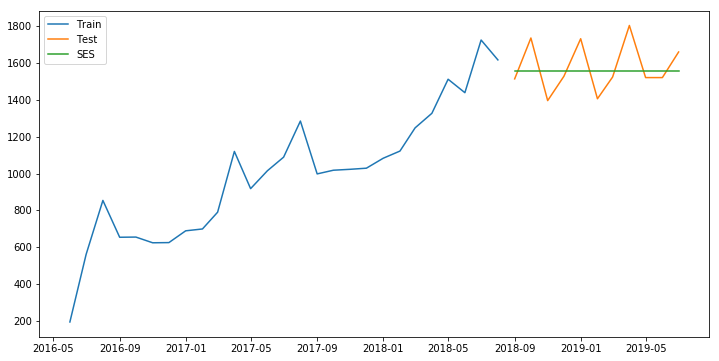

In [39]:
plt.figure(figsize=(12,6))
plt.plot(train['Data'], label='Train')
plt.plot(test['Data'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')

In [40]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test.Data, y_hat_avg.SES))
rmse = round(rmse, 3)
# Mean Absolute Percentage Error
abs_error = np.abs(y_test['Data']-y_hat_avg.SES)
actual = y_test['Data']
mape = np.round(np.mean(abs_error/actual),4)
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Method':['SES forecast'], 'RMSE': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE', 'MAPE']]
resultsDf

,Method,RMSE,MAPE
0,Simple average forecast,594.108,0.3635
0,Moving average forecast,101.840,0.0538
0,SES forecast,131.255,0.0674


In [41]:
fit1 = ExponentialSmoothing(np.asarray(train['Data']) ,seasonal_periods=12 ,trend='add', seasonal='None').fit()
fit1.params

{'smoothing_level': 0.528093928858748,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 318.4737363893516,
 'initial_slope': 49.058400296523416,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [42]:
y_hat_avg['Holt'] = fit1.forecast(len(test))

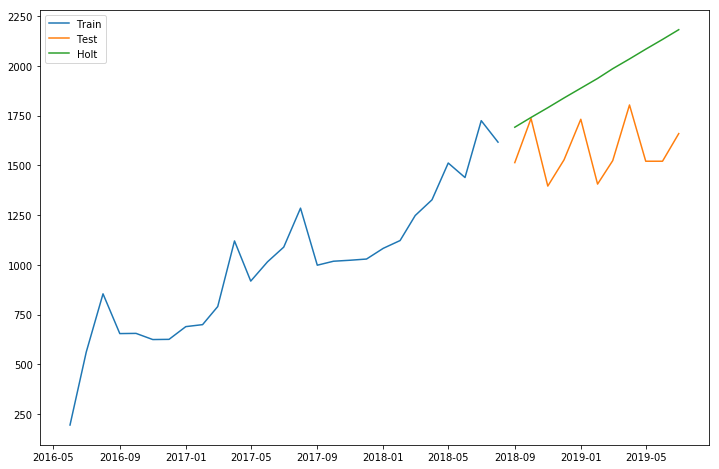

In [43]:
plt.figure(figsize=(12,8))
plt.plot( train['Data'], label='Train')
plt.plot(test['Data'], label='Test')
plt.plot(y_hat_avg['Holt'], label='Holt')
plt.legend(loc='best')
plt.show()

In [44]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test.Data, y_hat_avg.Holt))
rmse = round(rmse, 3)
# Mean Absolute Percentage Error
abs_error = np.abs(y_test['Data']-y_hat_avg.Holt)
actual = y_test['Data']
mape = np.round(np.mean(abs_error/actual),4)
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Method':['Holt'], 'RMSE': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE', 'MAPE']]
resultsDf


,Method,RMSE,MAPE
0,Simple average forecast,594.108,0.3635
0,Moving average forecast,101.840,0.0538
0,SES forecast,131.255,0.0674
0,Holt,407.255,0.2359


In [45]:
y_hat_avg = test.copy()

In [47]:
fit1 = ExponentialSmoothing(np.asarray(train['Data']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
fit1.params

{'smoothing_level': 0.10526315549123347,
 'smoothing_slope': 0.040314357373408743,
 'smoothing_seasonal': 0.8947368397017597,
 'damping_slope': nan,
 'initial_level': 676.0986493903134,
 'initial_slope': 28.543124942003573,
 'initial_seasons': array([-615.76077815, -293.12275807,  -29.0399143 , -251.27130632,
        -267.65865237, -316.4601126 , -334.60744385, -289.16084822,
        -296.11228463, -222.52142617,   89.39649677, -114.64138083]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

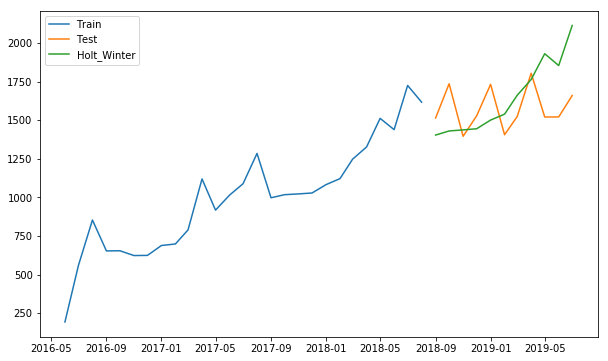

In [48]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(10,6))
plt.plot( train['Data'], label='Train')
plt.plot(test['Data'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [49]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test.Data, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)
# Mean Absolute Percentage Error
abs_error = np.abs(y_test['Data']-y_hat_avg.Holt_Winter)
actual = y_test['Data']
mape = np.round(np.mean(abs_error/actual),4)
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Method':['Holt Winter forecast - Additive'], 'RMSE': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE', 'MAPE']]
resultsDf

,Method,RMSE,MAPE
0,Simple average forecast,594.108,0.3635
0,Moving average forecast,101.840,0.0538
0,SES forecast,131.255,0.0674
0,Holt,407.255,0.2359
0,Holt Winter forecast - Additive,250.454,0.1304


In [50]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Data']) ,seasonal_periods=12 ,trend='add', seasonal='mul').fit()
fit1.params

{'smoothing_level': 0.05263151787754322,
 'smoothing_slope': 0.05263151787754322,
 'smoothing_seasonal': 0.9473677258564471,
 'damping_slope': nan,
 'initial_level': 882.6653729773836,
 'initial_slope': 37.26723602255546,
 'initial_seasons': array([0.32938522, 0.60895325, 0.86833901, 0.66235502, 0.6506224 ,
        0.61230853, 0.59669046, 0.62044502, 0.60466145, 0.63078854,
        0.75008733, 0.60085236]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [51]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

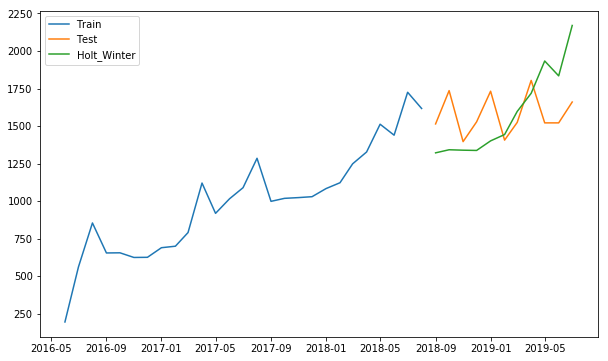

In [52]:
plt.figure(figsize=(10,6))
plt.plot( train['Data'], label='Train')
plt.plot(test['Data'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [1]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test.Data, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)
# Mean Absolute Percentage Error
abs_error = np.abs(y_test['Data']-y_hat_avg.Holt_Winter)
actual = y_test['Data']
mape = np.round(np.mean(abs_error/actual),4)
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Method':['Holt Winter forecast - Multiplicative'], 'RMSE': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE', 'MAPE']]
resultsDf.index = [i for i in range(len(resultsDf))]
resultsDf

NameError: name 'np' is not defined